In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import calendar

In [5]:
# Load datasets
industrial_df = pd.read_csv("C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\DA_KNN\\IndustrialDA_KNN.csv") 
urban_df = pd.read_csv("C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\DA_KNN\\UrbanDA_KNN.csv")  
residential_df = pd.read_csv("C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\DA_KNN\\ResidentialDA_KNN.csv") 

C:\Users\arock\AppData\Local\Temp\ipykernel_6564\3829541081.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Year'] = pd.to_datetime(df['From Date']).dt.year
C:\Users\arock\AppData\Local\Temp\ipykernel_6564\3829541081.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Year'] = pd.to_datetime(df['From Date']).dt.year
C:\Users\arock\AppData\Local\Temp\ipykernel_6564\3829541081.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Year'] = pd.to_datetime(df['From Date']).dt.year


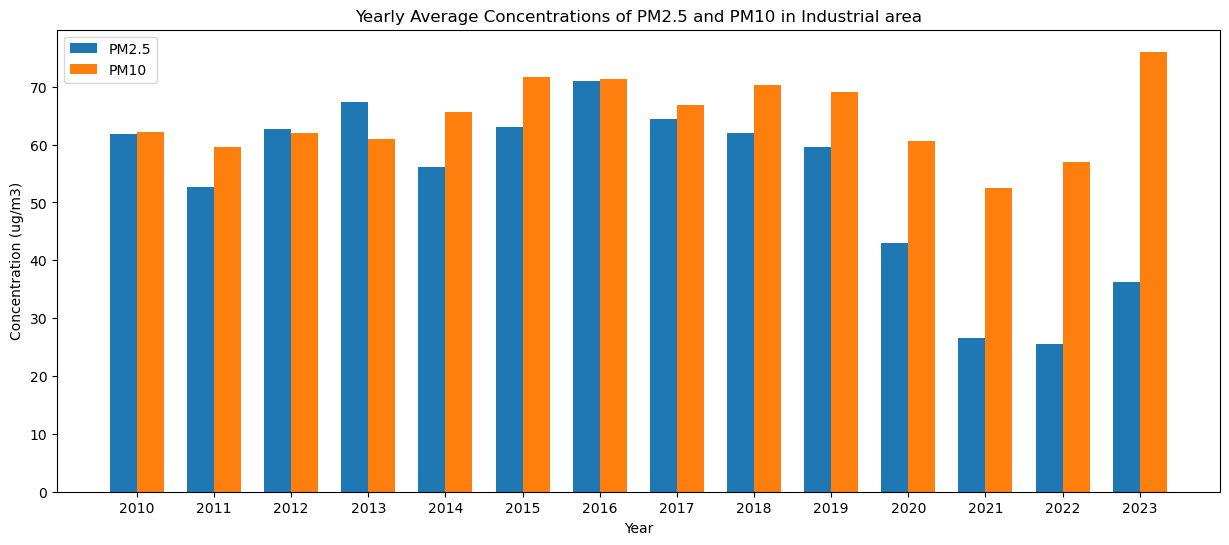

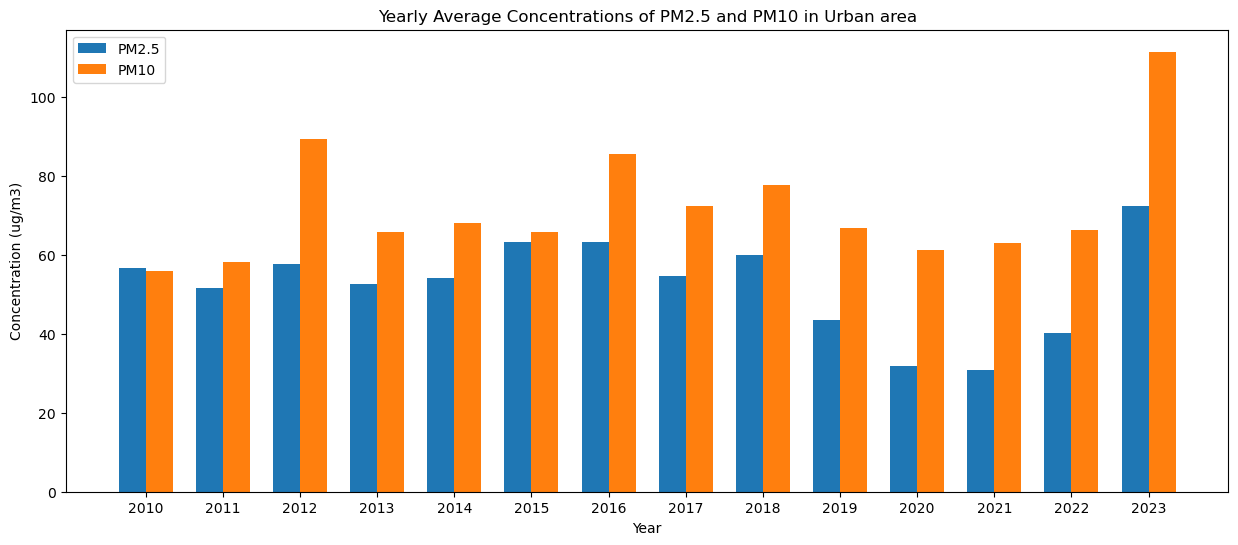

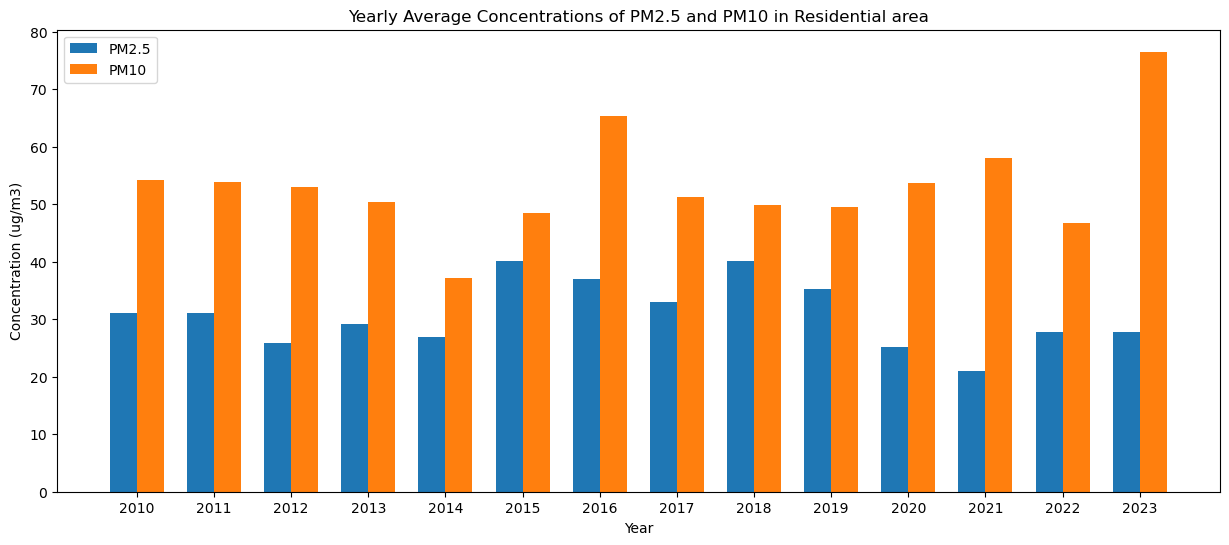

In [6]:
# Function to prepare data for the bar plot
def prepare_data_for_bar_plot(df):
    # Convert 'From Date' to datetime and filter data from 2010 to 2023
    df['Year'] = pd.to_datetime(df['From Date']).dt.year
    filtered_df = df[df['Year'].between(2010, 2023)]

    # Group by year and calculate mean for PM2.5 and PM10
    yearly_data = filtered_df.groupby('Year')[['PM2.5 (ug/m3)', 'PM10 (ug/m3)']].mean()
    return yearly_data
    
# Prepare data for plotting
industrial_yearly = prepare_data_for_bar_plot(industrial_df)
urban_yearly = prepare_data_for_bar_plot(urban_df)
residential_yearly = prepare_data_for_bar_plot(residential_df)

# Plotting function (same as before)
def plot_comparison_bar(yearly_data, title):
    # Setting up bar positions
    bar_width = 0.35
    index = np.arange(len(yearly_data))

    fig, ax = plt.subplots(figsize=(15, 6))
    bars1 = ax.bar(index - bar_width/2, yearly_data['PM2.5 (ug/m3)'], bar_width, label='PM2.5')
    bars2 = ax.bar(index + bar_width/2, yearly_data['PM10 (ug/m3)'], bar_width, label='PM10')

    ax.set_xlabel('Year')
    ax.set_ylabel('Concentration (ug/m3)')
    ax.set_title(f'Yearly Average Concentrations of PM2.5 and PM10 in {title}')
    ax.set_xticks(index)
    ax.set_xticklabels(yearly_data.index)
    ax.legend()

    plt.show()

# Plotting bar plots for each location
plot_comparison_bar(industrial_yearly, 'Industrial area')
plot_comparison_bar(urban_yearly, 'Urban area')
plot_comparison_bar(residential_yearly, 'Residential area')

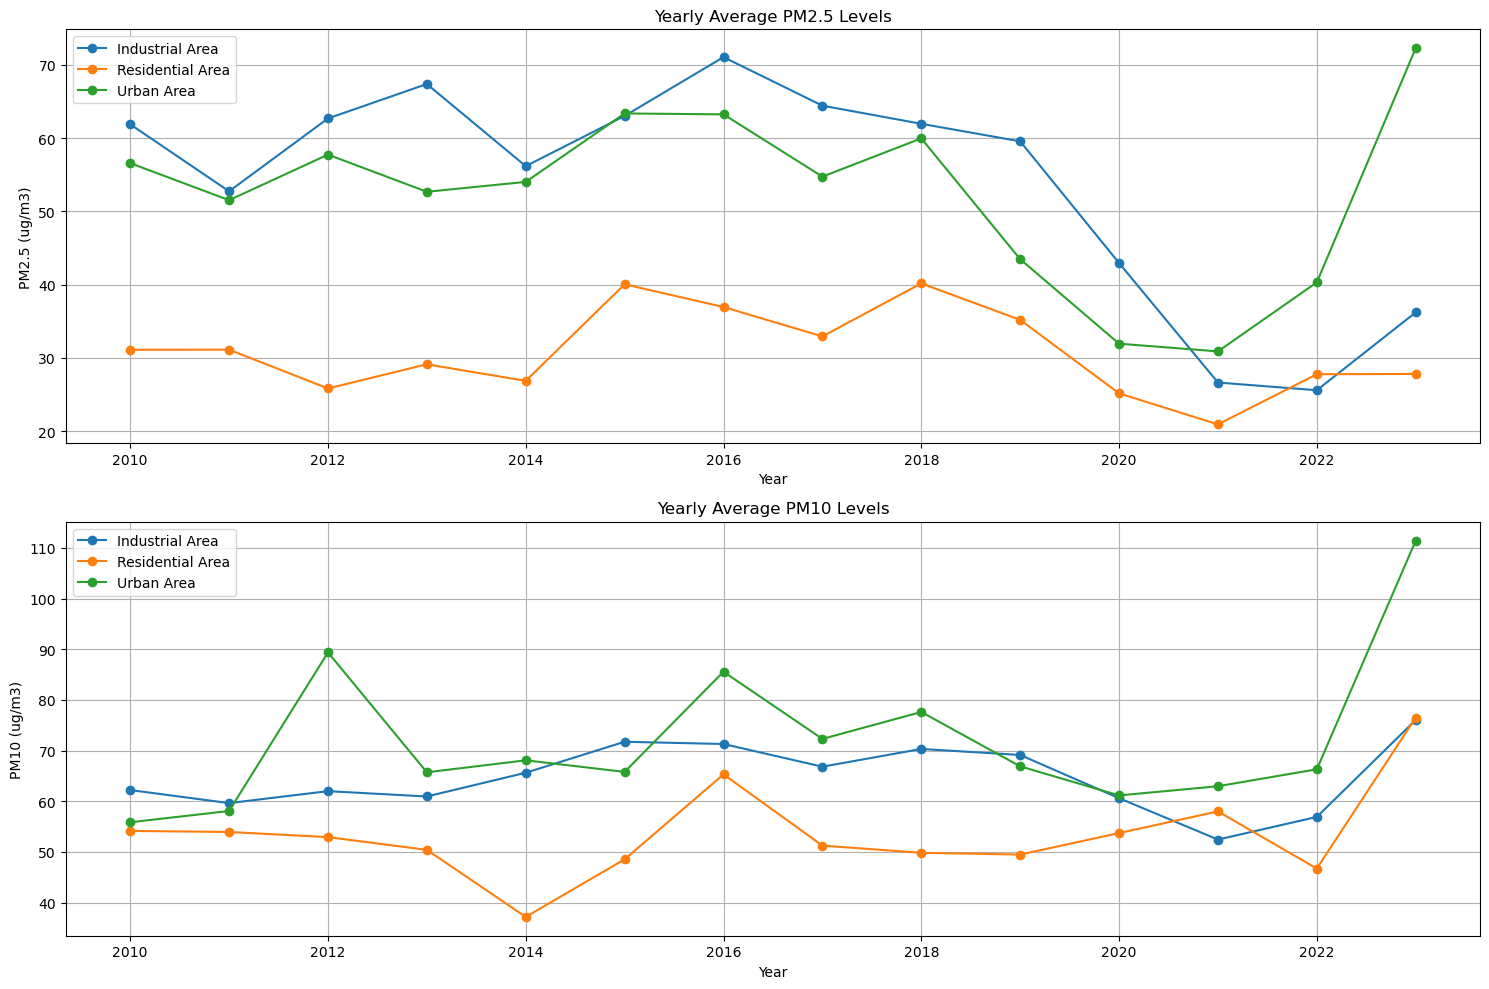

In [7]:
#Yearly Trends
# Create separate plots for PM2.5 and PM10
plt.figure(figsize=(15, 10))

# PM2.5 Plot
plt.subplot(2, 1, 1)
plt.plot(industrial_yearly.index, industrial_yearly['PM2.5 (ug/m3)'], label='Industrial Area', marker='o')
plt.plot(residential_yearly.index, residential_yearly['PM2.5 (ug/m3)'], label='Residential Area', marker='o')
plt.plot(urban_yearly.index, urban_yearly['PM2.5 (ug/m3)'], label='Urban Area', marker='o')
plt.title('Yearly Average PM2.5 Levels')
plt.xlabel('Year')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.grid(True)

# PM10 Plot
plt.subplot(2, 1, 2)
plt.plot(industrial_yearly.index, industrial_yearly['PM10 (ug/m3)'], label='Industrial Area', marker='o')
plt.plot(residential_yearly.index, residential_yearly['PM10 (ug/m3)'], label='Residential Area', marker='o')
plt.plot(urban_yearly.index, urban_yearly['PM10 (ug/m3)'], label='Urban Area', marker='o')
plt.title('Yearly Average PM10 Levels')
plt.xlabel('Year')
plt.ylabel('PM10 (ug/m3)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\arock\AppData\Local\Temp\ipykernel_6564\3908602918.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  'PM2.5 (ug/m3)': pd.np.random.rand(60) * 100,
C:\Users\arock\AppData\Local\Temp\ipykernel_6564\3908602918.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  'PM10 (ug/m3)': pd.np.random.rand(60) * 150
C:\Users\arock\AppData\Local\Temp\ipykernel_6564\3908602918.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  'PM2.5 (ug/m3)': pd.np.random.rand(60) * 100,
C:\Users\arock\AppData\Local\Temp\ipykernel_6564\3908602918.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  'PM10 (ug/m3)': pd.np.random.rand(60) * 150
C:\Users\a

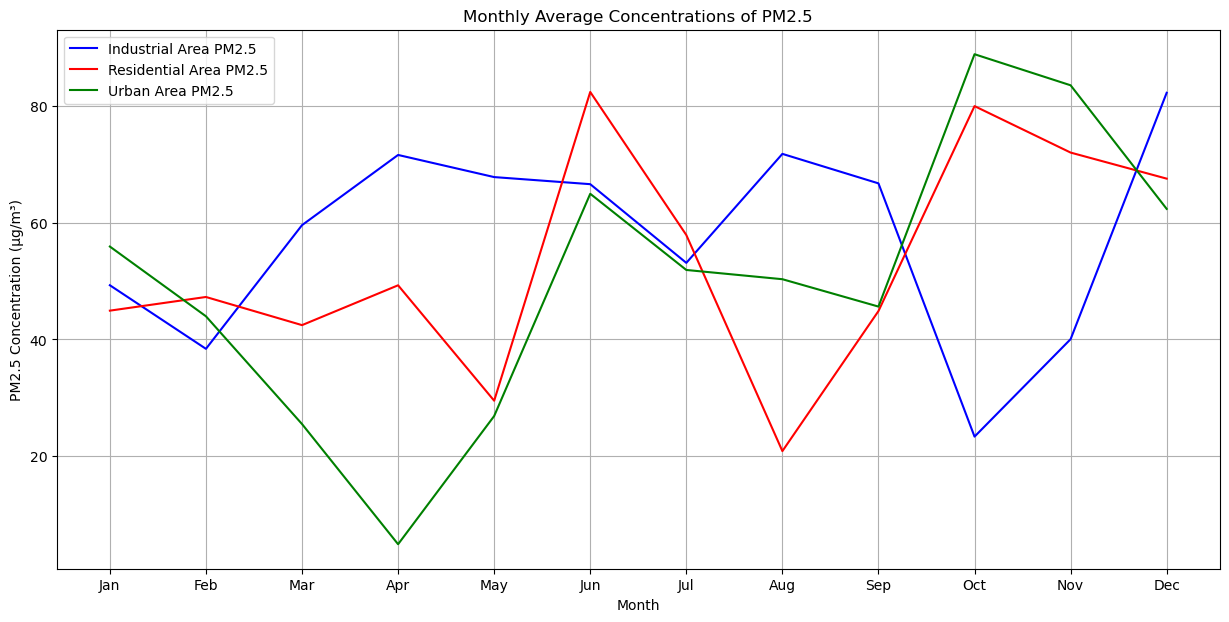

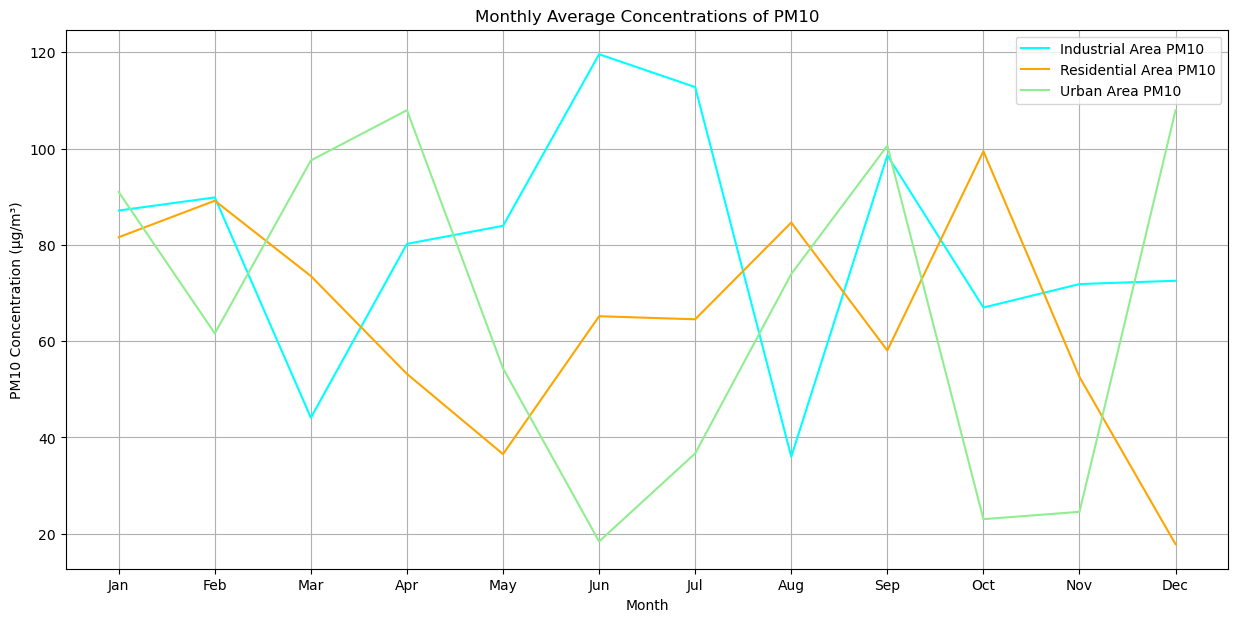

In [8]:
#Monthly Trends
# Sample dataframes
industrial_month = pd.DataFrame({
    'From Date': pd.date_range(start='2010-01-01', periods=60, freq='MS'),
    'PM2.5 (ug/m3)': pd.np.random.rand(60) * 100,
    'PM10 (ug/m3)': pd.np.random.rand(60) * 150
})
residential_month = pd.DataFrame({
    'From Date': pd.date_range(start='2010-01-01', periods=60, freq='MS'),
    'PM2.5 (ug/m3)': pd.np.random.rand(60) * 100,
    'PM10 (ug/m3)': pd.np.random.rand(60) * 150
})
urban_month = pd.DataFrame({
    'From Date': pd.date_range(start='2010-01-01', periods=60, freq='MS'),
    'PM2.5 (ug/m3)': pd.np.random.rand(60) * 100,
    'PM10 (ug/m3)': pd.np.random.rand(60) * 150
})

# Convert 'From Date' columns to datetime
industrial_month['From Date'] = pd.to_datetime(industrial_df['From Date'])
residential_month['From Date'] = pd.to_datetime(residential_df['From Date'])
urban_month['From Date'] = pd.to_datetime(urban_df['From Date'])

# Add a month column
industrial_month['Month'] = industrial_month['From Date'].dt.month
residential_month['Month'] = residential_month['From Date'].dt.month
urban_month['Month'] = urban_month['From Date'].dt.month

# Group by month and calculate the mean for PM2.5 and PM10
industrial_monthly = industrial_month.groupby('Month').mean()[['PM2.5 (ug/m3)', 'PM10 (ug/m3)']]
residential_monthly = residential_month.groupby('Month').mean()[['PM2.5 (ug/m3)', 'PM10 (ug/m3)']]
urban_monthly = urban_month.groupby('Month').mean()[['PM2.5 (ug/m3)', 'PM10 (ug/m3)']]

# Define month names
months = list(calendar.month_abbr)[1:]

# PM2.5 Plot
plt.figure(figsize=(15, 7))
plt.plot(months, industrial_monthly['PM2.5 (ug/m3)'], label='Industrial Area PM2.5', color='blue')
plt.plot(months, residential_monthly['PM2.5 (ug/m3)'], label='Residential Area PM2.5', color='red')
plt.plot(months, urban_monthly['PM2.5 (ug/m3)'], label='Urban Area PM2.5', color='green')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.title('Monthly Average Concentrations of PM2.5')
plt.legend()
plt.grid(True)
plt.show()

# PM10 Plot
plt.figure(figsize=(15, 7))
plt.plot(months, industrial_monthly['PM10 (ug/m3)'], label='Industrial Area PM10', color='cyan')
plt.plot(months, residential_monthly['PM10 (ug/m3)'], label='Residential Area PM10', color='orange')
plt.plot(months, urban_monthly['PM10 (ug/m3)'], label='Urban Area PM10', color='lightgreen')
plt.xlabel('Month')
plt.ylabel('PM10 Concentration (µg/m³)')
plt.title('Monthly Average Concentrations of PM10')
plt.legend()
plt.grid(True)
plt.show()


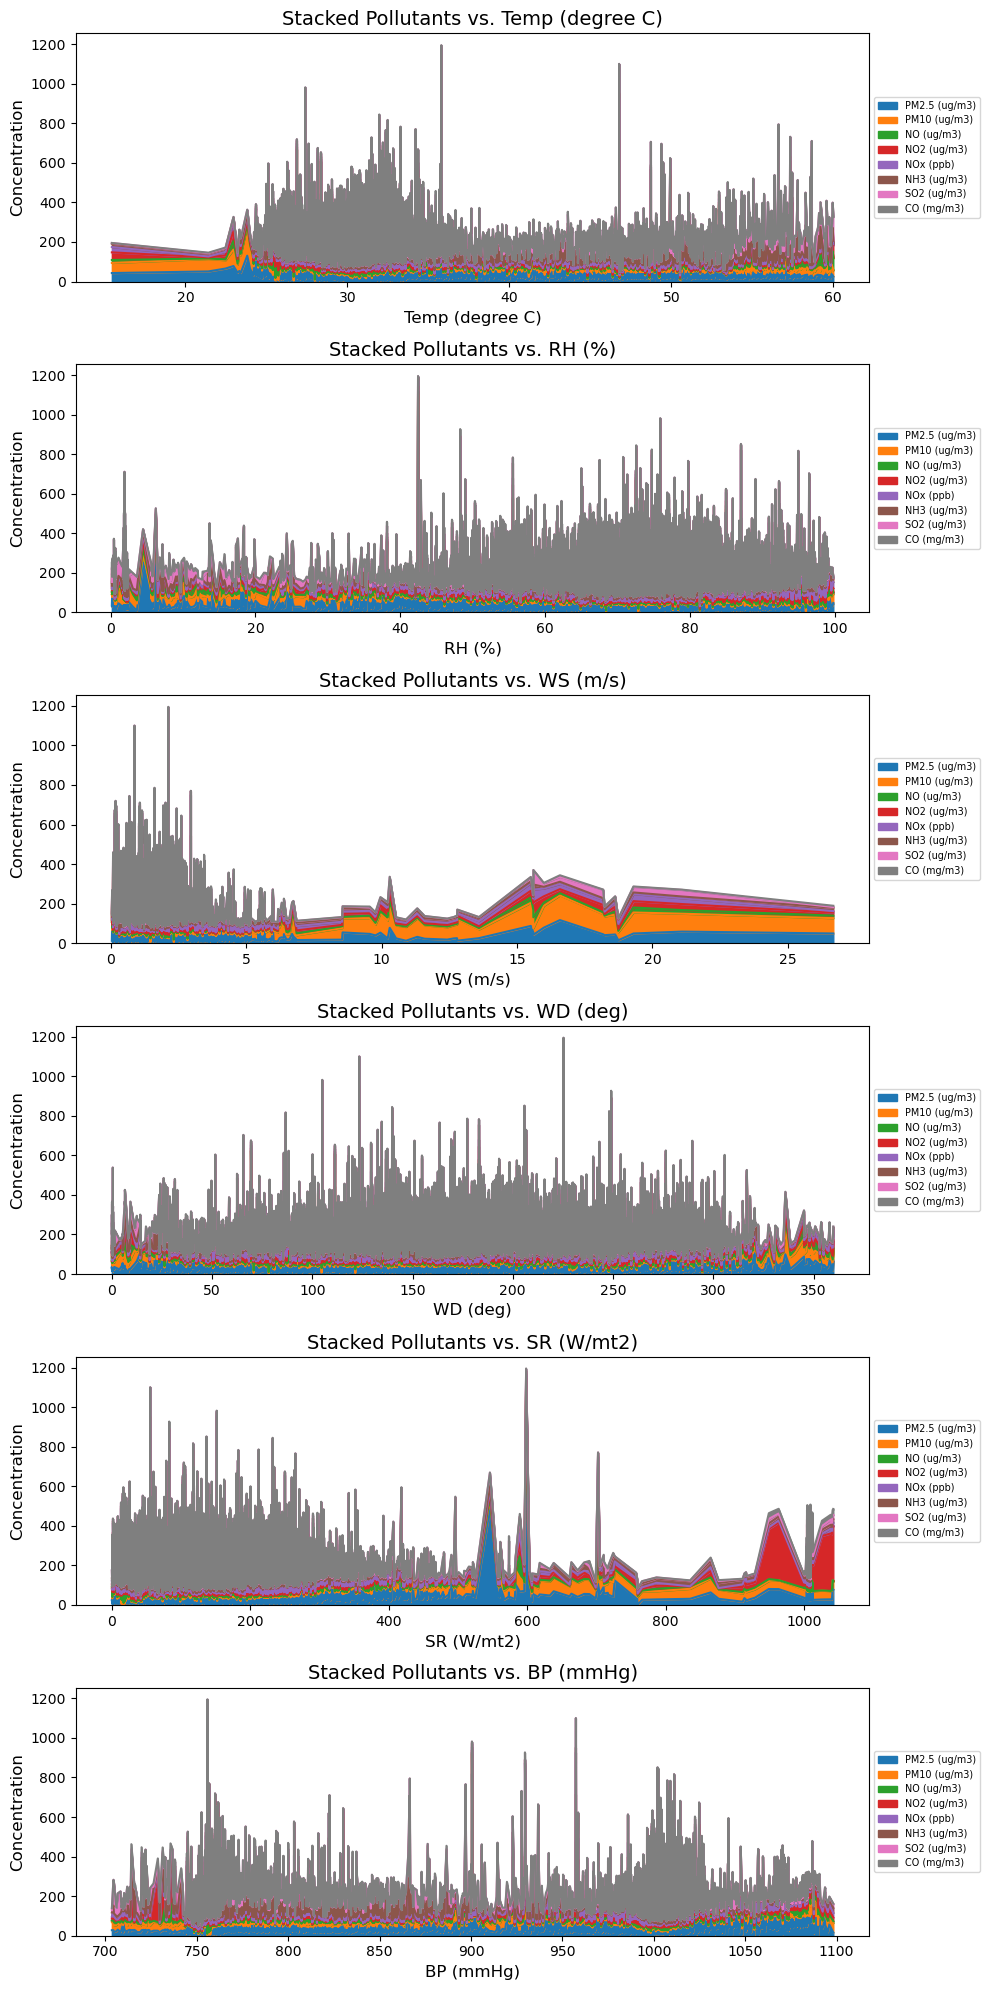

In [9]:

# Set a clear and high-contrast color palette
sns.set_palette('tab10')

# Merge the datasets
df = pd.concat([industrial_df, residential_df, urban_df])

# Define pollutants (excluding Ozone) and meteorological factors
pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
              'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']
met_factors = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']

# Generate stacked area plots for each meteorological factor
fig, axes = plt.subplots(len(met_factors), 1, figsize=(10, 20))  # 6 rows, 1 column

for i, met_factor in enumerate(met_factors):
    df.groupby(met_factor)[pollutants].mean().plot(kind='area', stacked=True, ax=axes[i])
    axes[i].set_title(f'Stacked Pollutants vs. {met_factor}', fontsize=14)
    axes[i].set_ylabel('Concentration', fontsize=12)
    axes[i].set_xlabel(met_factor, fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-small')

plt.tight_layout()
plt.show()


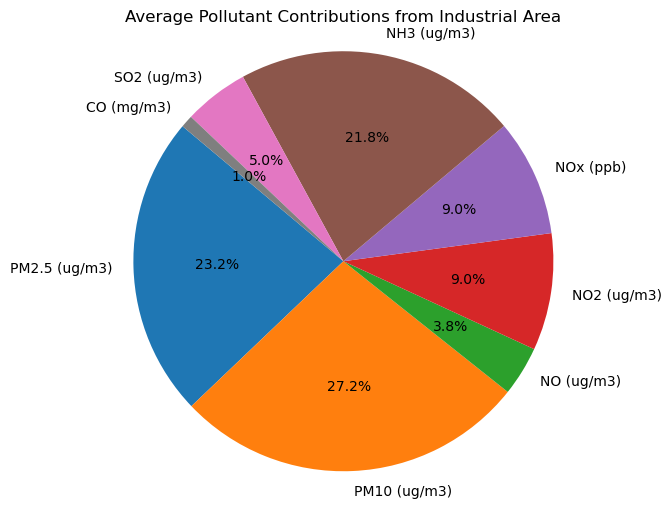

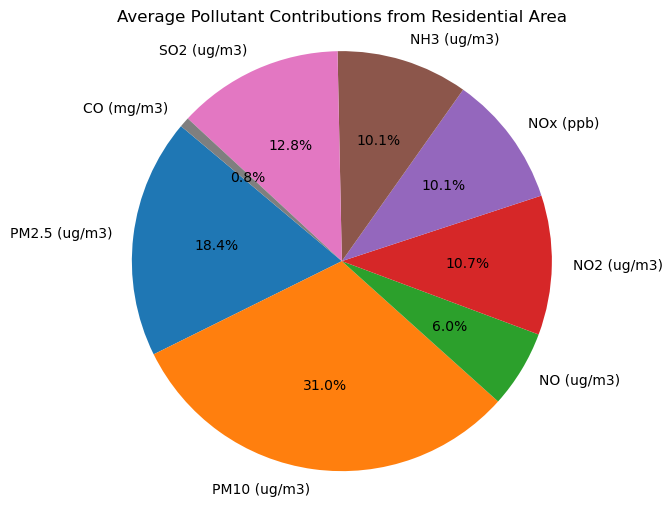

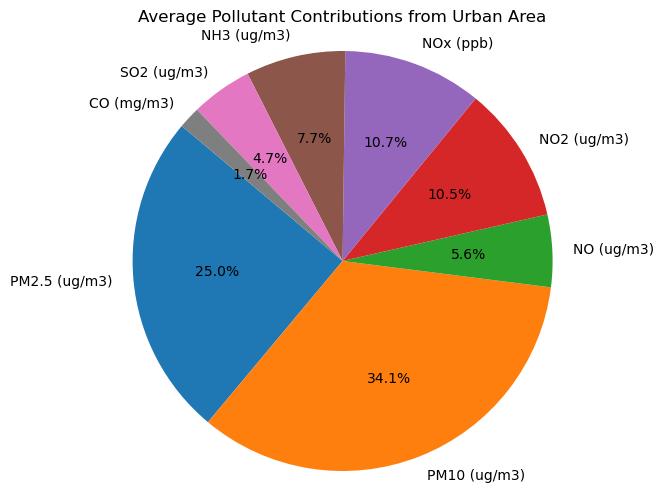

In [10]:

# Selecting only the pollutant columns
pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
              'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)']

# Calculating mean values for the pollutants
industrial_pollutants = industrial_df[pollutants].mean()
residential_pollutants = residential_df[pollutants].mean()
urban_pollutants = urban_df[pollutants].mean()

# Function to plot pie chart for pollutant data
def plot_pie_chart(data, title):
    plt.figure(figsize=(8, 6))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting separate pie charts for each location
plot_pie_chart(industrial_pollutants, 'Average Pollutant Contributions from Industrial Area')
plot_pie_chart(residential_pollutants, 'Average Pollutant Contributions from Residential Area')
plot_pie_chart(urban_pollutants, 'Average Pollutant Contributions from Urban Area')

# Show the plots
plt.show()


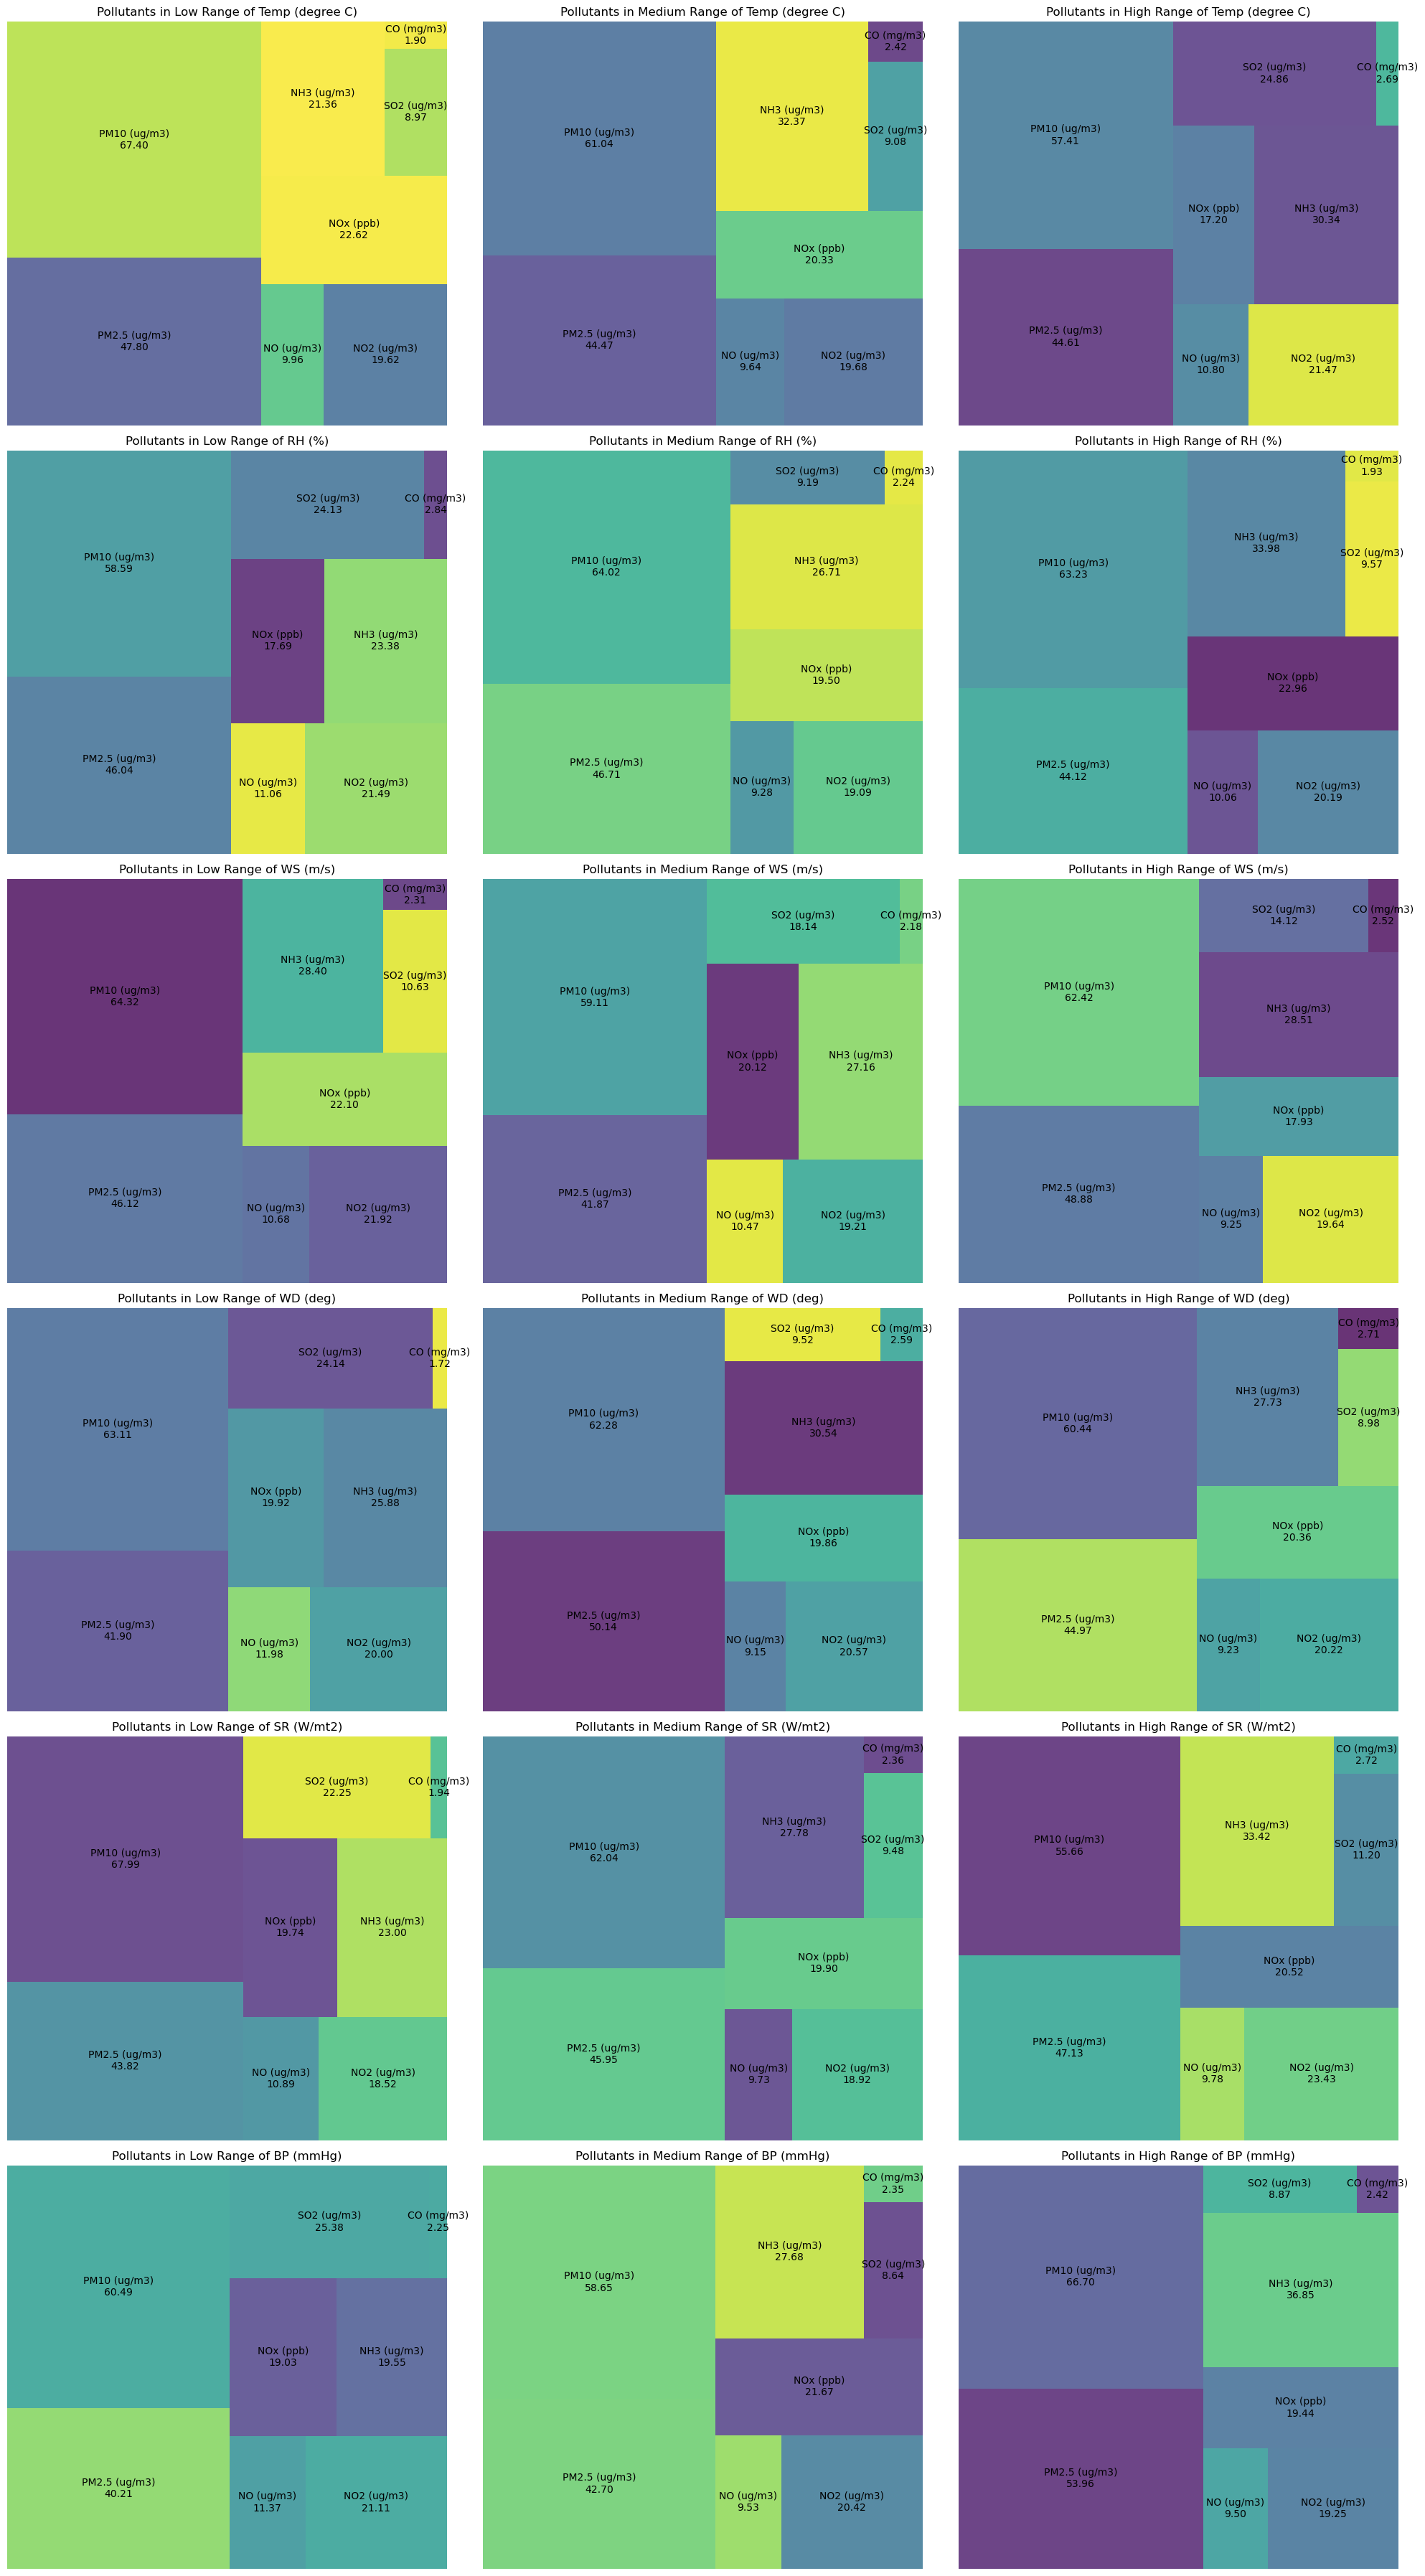

In [11]:
import pandas as pd
import squarify
import matplotlib.pyplot as plt

# Assuming df is your dataframe and pollutants is your list of pollutants
bin_labels = ['Low', 'Medium', 'High']

# Define the meteorological factors for binning
factors = [
    'Temp (degree C)', 
    'RH (%)', 
    'WS (m/s)', 
    'WD (deg)', 
    'SR (W/mt2)', 
    'BP (mmHg)'
]

# Create figure for the treemaps
fig, axes = plt.subplots(len(factors), 3, figsize=(20, 6 * len(factors)))  # Rows for each factor, 3 columns for Low, Medium, High

# Loop through each factor and create treemaps
for row, factor in enumerate(factors):
    # Create bins for the current factor
    df[factor + '_bin'] = pd.qcut(df[factor], q=3, labels=bin_labels)

    # Prepare the data for treemap
    treemap_data = df.groupby(factor + '_bin')[pollutants].mean().reset_index()

    # Plot each treemap for the current factor
    for col, temp_range in enumerate(bin_labels):
        # Subset the dataframe for the current range
        subset = treemap_data[treemap_data[factor + '_bin'] == temp_range]

        # Prepare sizes and labels for the treemap
        sizes = subset[pollutants].values.flatten()
        labels = [f"{pollutant}\n{size:.2f}" for pollutant, size in zip(pollutants, sizes)]

        # Create the treemap on the appropriate subplot
        squarify.plot(sizes=sizes, label=labels, alpha=0.8, ax=axes[row, col])
        axes[row, col].set_title(f'Pollutants in {temp_range} Range of {factor}')
        axes[row, col].axis('off')  # Remove the axes

# Adjust layout and show plot
plt.tight_layout()
plt.show()
